In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

### Credi Card Fraud Detection
+ 2013년 9월 유럽 신용카드 거래 기록
+ 총 284,807건의 데이터 제공
+ time, Amount, Class 컬럼 등을 제외하고 PCA로 변환되어 있음
+ Class 변수값은 0 (정상), 1(비정상)으로 셋팅

#### 데이터 읽어오기

In [3]:
ccf = pd.read_csv('data/creditcard.csv')
ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 결측치/자료형 확인

In [5]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### class 변수값 확인

In [7]:
ccf['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### 284315, 492
#### 오버샘플링, 언더샘플링을 통해 데이터 증식/감소가 필요할 수도 있음

<AxesSubplot:xlabel='Class', ylabel='count'>

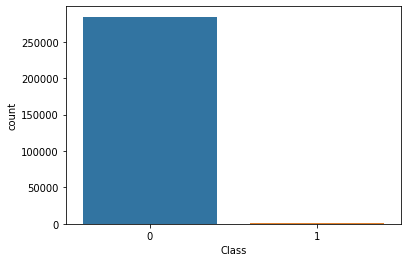

In [8]:
sns.countplot(x='Class', data=ccf)

#### 데이터 나누기

In [10]:
data = ccf.iloc[:,1:29]
target = ccf.Class

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, stratify = target, random_state=2111151005)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtclf = DecisionTreeClassifier(criterion = 'entropy')
dtclf.fit(Xtrain,ytrain)
pred = dtclf.predict(Xtest)

In [18]:
accuracy_score(ytest, pred)

0.9992158515033414

In [22]:
precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), roc_auc_score(ytest, pred)

(0.7913669064748201,
 0.7432432432432432,
 0.7665505226480835,
 0.8714516233802241)

In [13]:
lrclf = LogisticRegression(solver='sag', multi_class='multinomial', C=0.01)
lrclf.fit(Xtrain,ytrain)
pred = lrclf.predict(Xtest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [14]:
accuracy_score(ytest, pred)

0.9992626663389628